<a href="https://colab.research.google.com/github/sathyanarayanankrishnan/DataScience/blob/main/DS_Test_Exercise_1/Exercises_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [40]:
df_stock= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')


### Step 3. Assign it to a variable apple

In [41]:
apple=df_stock

### Step 4.  Check out the type of the columns

In [42]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [43]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [44]:
apple.set_index('Date', inplace=True)


### Step 7.  Is there any duplicate dates?

In [26]:
apple.index.has_duplicates

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [45]:
apple=apple.sort_index(ascending=True)
print(apple)

             Open   High    Low  Close     Volume  Adj Close
Date                                                        
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
...           ...    ...    ...    ...        ...        ...
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35

[8465 rows x 6 columns]


### Step 9. Get the last business day of each month

In [57]:
a= apple.filter(apple.index.month==1)

### Step 10.  What is the difference in days between the first day and the oldest

In [50]:
diff = apple.index.max() - apple.index.min() 

### Step 11.  How many months in the data we have?

In [58]:
apple["month"] = pd.DatetimeIndex(apple.index).month
apple["month"].count()

8465

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

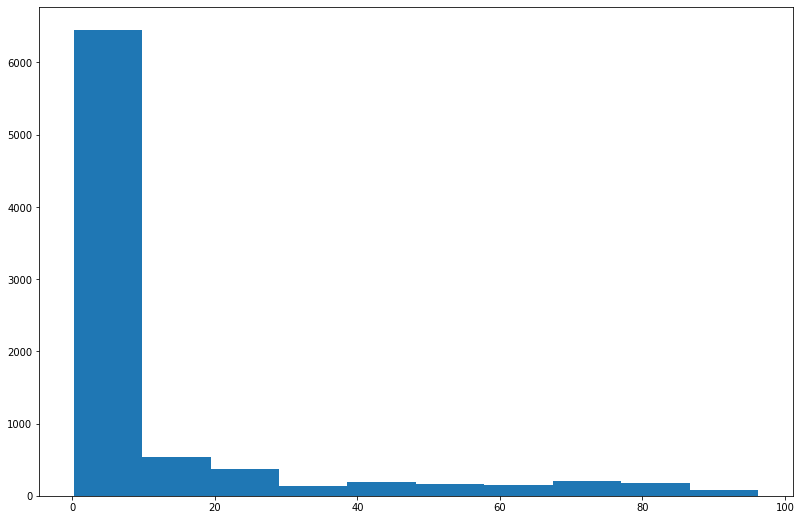

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5, 9))
plt.hist(apple["Adj Close"])
plt.show()

### BONUS: Create your own question and answer it.

In [61]:
#Describe the data frame 
apple.describe(include='all')

,Open,High,Low,Close,Volume,Adj Close,month
count,8465.000000,8465.000000,8465.000000,8465.000000,8.465000e+03,8465.000000,8465.000000
mean,98.593926,99.848683,97.226790,98.549199,9.391214e+07,11.095014,6.500177
std,141.965350,143.155674,140.548326,141.877244,8.993202e+07,21.133016,3.436025
min,11.120000,11.120000,11.000000,11.000000,2.504000e+05,0.170000,1.000000
25%,25.750000,26.000000,25.120000,25.630000,3.704960e+07,0.900000,4.000000
50%,40.750000,41.500000,40.000000,40.750000,6.636000e+07,1.410000,6.000000
75%,79.500000,81.000000,78.740000,80.000000,1.177701e+08,8.660000,9.000000
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09,96.280000,12.000000
